<a href="https://colab.research.google.com/github/NitinShindeJ/TensorFlow2.0/blob/master/My_learn_TF2.0/TF2_0_RNN_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install Tensor flow
!pip install -q tensorflow==2.0.beta1

     |████████████████████████████████| 87.9MB 63kB/s 
     |████████████████████████████████| 501kB 39.1MB/s 
     |████████████████████████████████| 3.1MB 29.4MB/s 


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.layers import Dense, Input, LSTM, GlobalMaxPool2D, Flatten, GRU, SimpleRNN, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Optimizer, SGD, Adam

In [0]:
import tensorflow as tf

In [15]:
#Data Loading
df_mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = df_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
print("X_Train Shape: ", X_train.shape)

X_Train Shape:  (60000, 28, 28)


In [31]:
#Build The Model
i = Input(shape=X_train[0].shape) 
x = LSTM(128, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(10, activation='softmax')(x)

model = Model(i,x)

In [32]:
#Compile and Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.3908 - accuracy: 0.8819 - val_loss: 0.1597 - val_accuracy: 0.9522
Epoch 2/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.1122 - accuracy: 0.9667 - val_loss: 0.0834 - val_accuracy: 0.9744
Epoch 3/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0752 - accuracy: 0.9777 - val_loss: 0.0604 - val_accuracy: 0.9820
Epoch 4/10
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.0542 - accuracy: 0.9839 - val_loss: 0.0549 - val_accuracy: 0.9849
Epoch 5/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0576 - val_accuracy: 0.9824
Epoch 6/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0412 - val_accuracy: 0.9876
Epoch 7/10
60000/60000 [==============================] 

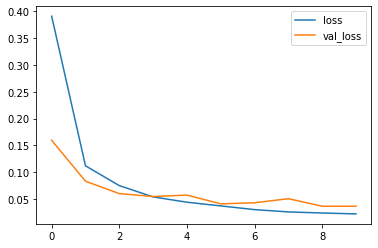

In [33]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

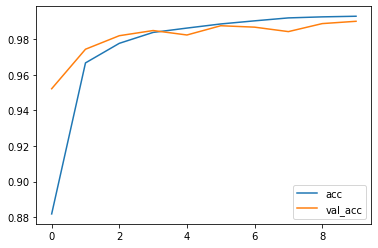

In [34]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

#Plot Confusion Matrix
def plot_conf_matrix(cm, classes,
                     normalize=False, 
                     title = 'Confusion Matrix',
                     cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[ 975    0    1    0    0    0    2    1    1    0]
 [   0 1131    1    1    0    0    1    1    0    0]
 [   1    2 1022    3    1    0    0    3    0    0]
 [   0    0    1 1006    0    0    0    1    2    0]
 [   0    0    0    0  963    0    4    2    1   12]
 [   1    0    0   15    0  871    1    1    1    2]
 [   3    2    0    0    1    0  951    0    1    0]
 [   0    1    5    2    1    0    0 1016    0    3]
 [   0    0    0    3    0    1    0    1  966    3]
 [   0    0    0    0    4    3    0    2    0 1000]]


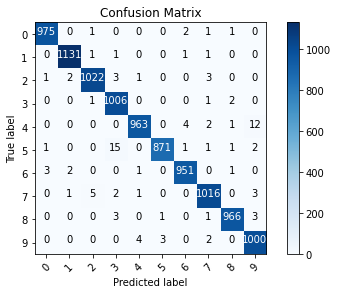

In [35]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_conf_matrix(cm, list(range(10)))

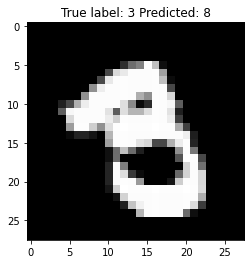

In [36]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != Y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (Y_test[i], p_test[i]));